# Collaborative filtering

## Material

* http://scikit-learn.org/stable/auto_examples/neural_networks/plot_rbm_logistic_classification.html
* http://www.pyimagesearch.com/2014/06/23/applying-deep-learning-rbm-mnist-using-python/

In [20]:
RANDOM_STATE = 0

from code.bernoulli_rbm import BernoulliRBM

rbm = BernoulliRBM(random_state=RANDOM_STATE, verbose=True)

rbm.batch_size = 250
rbm.learning_rate = 0.08
rbm.n_iter = 5000
rbm.n_components = 50 #400 # hidden units

## Data

In [21]:
class NONE:
    index = 107
    name = 'None'

import pandas as pd

plugins = pd.read_csv('data/plugin-category.csv', index_col='id').sort_index()
pedalboards = pd.read_csv('data/pedalboard-plugin-bag-of-words.csv', index_col=['index', 'id'])


# Alterar o nome da coluna de plugin 
plugins_copy = plugins.copy()
plugins_copy['Plugin'] = plugins_copy.name
plugins_copy['Category'] = plugins_copy.category

pedalboards.columns = [plugins_copy.Category, plugins_copy.Plugin]

# Remover None
#plugins_sem_none = plugins.drop(plugins.index[NONE.index])
#del pedalboards[NONE.name, NONE.name]
pedalboards[NONE.name, NONE.name] = 0
pedalboards.head(3)

Category   Filter_EQ Modulation     SFX Modulation    Delay            \
Plugin      M-Filter    TheVibe Z-Organ     Slicer PhaseDly FilterDly   
index id                                                                
0     9467         0          0       0          0        0         0   
1     8913         0          0       0          0        0         0   
2     7313         0          0       0          0        0         0   

Category                      Modulation    SFX  ...   None Amp Modeling  \
Plugin     PitchDly StereoDly   BitCrush Bomber  ...   None    TONE CITY   
index id                                         ...                       
0     9467        0         0          0      0  ...      0            0   
1     8913        0         0          0      0  ...      0            0   
2     7313        0         0          0      0  ...      0            0   

Category                                                                       
Plugin     B-BREAKER BGN DRIVE DELUXE-R ALIEN REVO-1 CAR DRIVE MS 1959 VX JMI  
index id                                                                       
0     9467         1         0        0     0      0         0       0      0  
1     8913         0         0        0     0      0         0       0      0  
2     7313         0         0        0     0      0         0       0      0  

[3 rows x 117 columns]

In [22]:
from sklearn.model_selection import train_test_split

pedalboards_train, pedalboards_test = train_test_split(pedalboards, train_size=.8, random_state=RANDOM_STATE)

## Training

In [23]:
from sklearn.pipeline import Pipeline

#classifier = Pipeline(steps=[('rbm', rbm)])
#classifier.fit(pedalboards_train)

rbm.fit(pedalboards_train)#.score_samples(pedalboards_train).mean()
#rbm.log

[BernoulliRBM] Iteration 1, pseudo-likelihood = -24.65, time = 0.07s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -18.45, time = 0.11s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -15.66, time = 0.08s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -15.10, time = 0.11s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -15.06, time = 0.08s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -15.03, time = 0.08s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -15.09, time = 0.08s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -15.09, time = 0.11s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -15.03, time = 0.08s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -15.02, time = 0.08s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -15.02, time = 0.11s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -15.00, time = 0.08s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -15.00, time = 0.08s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -14.94, time = 0.11s
[BernoulliRBM] Iteration 15, 

[BernoulliRBM] Iteration 119, pseudo-likelihood = -14.84, time = 0.07s
[BernoulliRBM] Iteration 120, pseudo-likelihood = -14.85, time = 0.09s
[BernoulliRBM] Iteration 121, pseudo-likelihood = -14.85, time = 0.07s
[BernoulliRBM] Iteration 122, pseudo-likelihood = -14.83, time = 0.07s
[BernoulliRBM] Iteration 123, pseudo-likelihood = -14.82, time = 0.09s
[BernoulliRBM] Iteration 124, pseudo-likelihood = -14.82, time = 0.07s
[BernoulliRBM] Iteration 125, pseudo-likelihood = -14.82, time = 0.07s
[BernoulliRBM] Iteration 126, pseudo-likelihood = -14.83, time = 0.09s
[BernoulliRBM] Iteration 127, pseudo-likelihood = -14.82, time = 0.07s
[BernoulliRBM] Iteration 128, pseudo-likelihood = -14.81, time = 0.08s
[BernoulliRBM] Iteration 129, pseudo-likelihood = -14.81, time = 0.09s
[BernoulliRBM] Iteration 130, pseudo-likelihood = -14.82, time = 0.07s
[BernoulliRBM] Iteration 131, pseudo-likelihood = -14.82, time = 0.07s
[BernoulliRBM] Iteration 132, pseudo-likelihood = -14.82, time = 0.09s
[Berno

[BernoulliRBM] Iteration 236, pseudo-likelihood = -14.38, time = 0.07s
[BernoulliRBM] Iteration 237, pseudo-likelihood = -14.39, time = 0.08s
[BernoulliRBM] Iteration 238, pseudo-likelihood = -14.39, time = 0.07s
[BernoulliRBM] Iteration 239, pseudo-likelihood = -14.38, time = 0.07s
[BernoulliRBM] Iteration 240, pseudo-likelihood = -14.37, time = 0.09s
[BernoulliRBM] Iteration 241, pseudo-likelihood = -14.36, time = 0.07s
[BernoulliRBM] Iteration 242, pseudo-likelihood = -14.35, time = 0.07s
[BernoulliRBM] Iteration 243, pseudo-likelihood = -14.35, time = 0.08s
[BernoulliRBM] Iteration 244, pseudo-likelihood = -14.36, time = 0.07s
[BernoulliRBM] Iteration 245, pseudo-likelihood = -14.36, time = 0.07s
[BernoulliRBM] Iteration 246, pseudo-likelihood = -14.36, time = 0.08s
[BernoulliRBM] Iteration 247, pseudo-likelihood = -14.35, time = 0.07s
[BernoulliRBM] Iteration 248, pseudo-likelihood = -14.34, time = 0.07s
[BernoulliRBM] Iteration 249, pseudo-likelihood = -14.33, time = 0.08s
[Berno

[BernoulliRBM] Iteration 353, pseudo-likelihood = -14.06, time = 0.07s
[BernoulliRBM] Iteration 354, pseudo-likelihood = -14.06, time = 0.08s
[BernoulliRBM] Iteration 355, pseudo-likelihood = -14.05, time = 0.07s
[BernoulliRBM] Iteration 356, pseudo-likelihood = -14.05, time = 0.07s
[BernoulliRBM] Iteration 357, pseudo-likelihood = -14.04, time = 0.09s
[BernoulliRBM] Iteration 358, pseudo-likelihood = -14.04, time = 0.08s
[BernoulliRBM] Iteration 359, pseudo-likelihood = -14.04, time = 0.07s
[BernoulliRBM] Iteration 360, pseudo-likelihood = -14.05, time = 0.08s
[BernoulliRBM] Iteration 361, pseudo-likelihood = -14.05, time = 0.07s
[BernoulliRBM] Iteration 362, pseudo-likelihood = -14.06, time = 0.07s
[BernoulliRBM] Iteration 363, pseudo-likelihood = -14.07, time = 0.08s
[BernoulliRBM] Iteration 364, pseudo-likelihood = -14.08, time = 0.07s
[BernoulliRBM] Iteration 365, pseudo-likelihood = -14.09, time = 0.07s
[BernoulliRBM] Iteration 366, pseudo-likelihood = -14.10, time = 0.08s
[Berno

[BernoulliRBM] Iteration 470, pseudo-likelihood = -13.90, time = 0.07s
[BernoulliRBM] Iteration 471, pseudo-likelihood = -13.90, time = 0.09s
[BernoulliRBM] Iteration 472, pseudo-likelihood = -13.89, time = 0.07s
[BernoulliRBM] Iteration 473, pseudo-likelihood = -13.87, time = 0.07s
[BernoulliRBM] Iteration 474, pseudo-likelihood = -13.87, time = 0.09s
[BernoulliRBM] Iteration 475, pseudo-likelihood = -13.87, time = 0.07s
[BernoulliRBM] Iteration 476, pseudo-likelihood = -13.86, time = 0.07s
[BernoulliRBM] Iteration 477, pseudo-likelihood = -13.86, time = 0.08s
[BernoulliRBM] Iteration 478, pseudo-likelihood = -13.85, time = 0.07s
[BernoulliRBM] Iteration 479, pseudo-likelihood = -13.84, time = 0.07s
[BernoulliRBM] Iteration 480, pseudo-likelihood = -13.84, time = 0.09s
[BernoulliRBM] Iteration 481, pseudo-likelihood = -13.84, time = 0.07s
[BernoulliRBM] Iteration 482, pseudo-likelihood = -13.84, time = 0.08s
[BernoulliRBM] Iteration 483, pseudo-likelihood = -13.83, time = 0.08s
[Berno

[BernoulliRBM] Iteration 587, pseudo-likelihood = -13.59, time = 0.07s
[BernoulliRBM] Iteration 588, pseudo-likelihood = -13.59, time = 0.09s
[BernoulliRBM] Iteration 589, pseudo-likelihood = -13.59, time = 0.07s
[BernoulliRBM] Iteration 590, pseudo-likelihood = -13.59, time = 0.07s
[BernoulliRBM] Iteration 591, pseudo-likelihood = -13.59, time = 0.09s
[BernoulliRBM] Iteration 592, pseudo-likelihood = -13.59, time = 0.07s
[BernoulliRBM] Iteration 593, pseudo-likelihood = -13.59, time = 0.07s
[BernoulliRBM] Iteration 594, pseudo-likelihood = -13.59, time = 0.08s
[BernoulliRBM] Iteration 595, pseudo-likelihood = -13.59, time = 0.07s
[BernoulliRBM] Iteration 596, pseudo-likelihood = -13.60, time = 0.07s
[BernoulliRBM] Iteration 597, pseudo-likelihood = -13.60, time = 0.08s
[BernoulliRBM] Iteration 598, pseudo-likelihood = -13.60, time = 0.07s
[BernoulliRBM] Iteration 599, pseudo-likelihood = -13.60, time = 0.07s
[BernoulliRBM] Iteration 600, pseudo-likelihood = -13.60, time = 0.08s
[Berno

[BernoulliRBM] Iteration 704, pseudo-likelihood = -13.56, time = 0.07s
[BernoulliRBM] Iteration 705, pseudo-likelihood = -13.57, time = 0.09s
[BernoulliRBM] Iteration 706, pseudo-likelihood = -13.57, time = 0.07s
[BernoulliRBM] Iteration 707, pseudo-likelihood = -13.58, time = 0.07s
[BernoulliRBM] Iteration 708, pseudo-likelihood = -13.59, time = 0.09s
[BernoulliRBM] Iteration 709, pseudo-likelihood = -13.58, time = 0.07s
[BernoulliRBM] Iteration 710, pseudo-likelihood = -13.59, time = 0.07s
[BernoulliRBM] Iteration 711, pseudo-likelihood = -13.60, time = 0.08s
[BernoulliRBM] Iteration 712, pseudo-likelihood = -13.60, time = 0.07s
[BernoulliRBM] Iteration 713, pseudo-likelihood = -13.60, time = 0.07s
[BernoulliRBM] Iteration 714, pseudo-likelihood = -13.60, time = 0.08s
[BernoulliRBM] Iteration 715, pseudo-likelihood = -13.60, time = 0.07s
[BernoulliRBM] Iteration 716, pseudo-likelihood = -13.60, time = 0.07s
[BernoulliRBM] Iteration 717, pseudo-likelihood = -13.59, time = 0.08s
[Berno

[BernoulliRBM] Iteration 822, pseudo-likelihood = -13.29, time = 0.08s
[BernoulliRBM] Iteration 823, pseudo-likelihood = -13.29, time = 0.09s
[BernoulliRBM] Iteration 824, pseudo-likelihood = -13.29, time = 0.09s
[BernoulliRBM] Iteration 825, pseudo-likelihood = -13.28, time = 0.07s
[BernoulliRBM] Iteration 826, pseudo-likelihood = -13.27, time = 0.09s
[BernoulliRBM] Iteration 827, pseudo-likelihood = -13.28, time = 0.08s
[BernoulliRBM] Iteration 828, pseudo-likelihood = -13.29, time = 0.08s
[BernoulliRBM] Iteration 829, pseudo-likelihood = -13.28, time = 0.09s
[BernoulliRBM] Iteration 830, pseudo-likelihood = -13.27, time = 0.08s
[BernoulliRBM] Iteration 831, pseudo-likelihood = -13.28, time = 0.09s
[BernoulliRBM] Iteration 832, pseudo-likelihood = -13.28, time = 0.07s
[BernoulliRBM] Iteration 833, pseudo-likelihood = -13.28, time = 0.08s
[BernoulliRBM] Iteration 834, pseudo-likelihood = -13.28, time = 0.07s
[BernoulliRBM] Iteration 835, pseudo-likelihood = -13.28, time = 0.09s
[Berno

[BernoulliRBM] Iteration 939, pseudo-likelihood = -13.18, time = 0.13s
[BernoulliRBM] Iteration 940, pseudo-likelihood = -13.18, time = 0.10s
[BernoulliRBM] Iteration 941, pseudo-likelihood = -13.19, time = 0.08s
[BernoulliRBM] Iteration 942, pseudo-likelihood = -13.19, time = 0.08s
[BernoulliRBM] Iteration 943, pseudo-likelihood = -13.19, time = 0.10s
[BernoulliRBM] Iteration 944, pseudo-likelihood = -13.19, time = 0.07s
[BernoulliRBM] Iteration 945, pseudo-likelihood = -13.19, time = 0.09s
[BernoulliRBM] Iteration 946, pseudo-likelihood = -13.19, time = 0.08s
[BernoulliRBM] Iteration 947, pseudo-likelihood = -13.20, time = 0.08s
[BernoulliRBM] Iteration 948, pseudo-likelihood = -13.19, time = 0.07s
[BernoulliRBM] Iteration 949, pseudo-likelihood = -13.18, time = 0.14s
[BernoulliRBM] Iteration 950, pseudo-likelihood = -13.18, time = 0.11s
[BernoulliRBM] Iteration 951, pseudo-likelihood = -13.18, time = 0.14s
[BernoulliRBM] Iteration 952, pseudo-likelihood = -13.17, time = 0.11s
[Berno

[BernoulliRBM] Iteration 1055, pseudo-likelihood = -13.13, time = 0.07s
[BernoulliRBM] Iteration 1056, pseudo-likelihood = -13.13, time = 0.09s
[BernoulliRBM] Iteration 1057, pseudo-likelihood = -13.14, time = 0.07s
[BernoulliRBM] Iteration 1058, pseudo-likelihood = -13.14, time = 0.08s
[BernoulliRBM] Iteration 1059, pseudo-likelihood = -13.14, time = 0.08s
[BernoulliRBM] Iteration 1060, pseudo-likelihood = -13.13, time = 0.08s
[BernoulliRBM] Iteration 1061, pseudo-likelihood = -13.12, time = 0.07s
[BernoulliRBM] Iteration 1062, pseudo-likelihood = -13.13, time = 0.08s
[BernoulliRBM] Iteration 1063, pseudo-likelihood = -13.13, time = 0.07s
[BernoulliRBM] Iteration 1064, pseudo-likelihood = -13.12, time = 0.07s
[BernoulliRBM] Iteration 1065, pseudo-likelihood = -13.11, time = 0.08s
[BernoulliRBM] Iteration 1066, pseudo-likelihood = -13.11, time = 0.08s
[BernoulliRBM] Iteration 1067, pseudo-likelihood = -13.11, time = 0.07s
[BernoulliRBM] Iteration 1068, pseudo-likelihood = -13.10, time 

[BernoulliRBM] Iteration 1169, pseudo-likelihood = -13.06, time = 0.07s
[BernoulliRBM] Iteration 1170, pseudo-likelihood = -13.06, time = 0.08s
[BernoulliRBM] Iteration 1171, pseudo-likelihood = -13.05, time = 0.07s
[BernoulliRBM] Iteration 1172, pseudo-likelihood = -13.05, time = 0.07s
[BernoulliRBM] Iteration 1173, pseudo-likelihood = -13.04, time = 0.08s
[BernoulliRBM] Iteration 1174, pseudo-likelihood = -13.05, time = 0.07s
[BernoulliRBM] Iteration 1175, pseudo-likelihood = -13.05, time = 0.07s
[BernoulliRBM] Iteration 1176, pseudo-likelihood = -13.05, time = 0.08s
[BernoulliRBM] Iteration 1177, pseudo-likelihood = -13.05, time = 0.07s
[BernoulliRBM] Iteration 1178, pseudo-likelihood = -13.05, time = 0.07s
[BernoulliRBM] Iteration 1179, pseudo-likelihood = -13.05, time = 0.09s
[BernoulliRBM] Iteration 1180, pseudo-likelihood = -13.05, time = 0.07s
[BernoulliRBM] Iteration 1181, pseudo-likelihood = -13.05, time = 0.07s
[BernoulliRBM] Iteration 1182, pseudo-likelihood = -13.05, time 

[BernoulliRBM] Iteration 1284, pseudo-likelihood = -13.01, time = 0.08s
[BernoulliRBM] Iteration 1285, pseudo-likelihood = -13.02, time = 0.09s
[BernoulliRBM] Iteration 1286, pseudo-likelihood = -13.03, time = 0.15s
[BernoulliRBM] Iteration 1287, pseudo-likelihood = -13.02, time = 0.11s
[BernoulliRBM] Iteration 1288, pseudo-likelihood = -13.01, time = 0.08s
[BernoulliRBM] Iteration 1289, pseudo-likelihood = -13.02, time = 0.08s
[BernoulliRBM] Iteration 1290, pseudo-likelihood = -13.03, time = 0.08s
[BernoulliRBM] Iteration 1291, pseudo-likelihood = -13.01, time = 0.07s
[BernoulliRBM] Iteration 1292, pseudo-likelihood = -13.00, time = 0.08s
[BernoulliRBM] Iteration 1293, pseudo-likelihood = -13.00, time = 0.09s
[BernoulliRBM] Iteration 1294, pseudo-likelihood = -12.99, time = 0.07s
[BernoulliRBM] Iteration 1295, pseudo-likelihood = -12.99, time = 0.07s
[BernoulliRBM] Iteration 1296, pseudo-likelihood = -12.98, time = 0.09s
[BernoulliRBM] Iteration 1297, pseudo-likelihood = -12.99, time 

[BernoulliRBM] Iteration 1400, pseudo-likelihood = -12.93, time = 0.07s
[BernoulliRBM] Iteration 1401, pseudo-likelihood = -12.92, time = 0.08s
[BernoulliRBM] Iteration 1402, pseudo-likelihood = -12.92, time = 0.15s
[BernoulliRBM] Iteration 1403, pseudo-likelihood = -12.92, time = 0.18s
[BernoulliRBM] Iteration 1404, pseudo-likelihood = -12.92, time = 0.07s
[BernoulliRBM] Iteration 1405, pseudo-likelihood = -12.93, time = 0.09s
[BernoulliRBM] Iteration 1406, pseudo-likelihood = -12.93, time = 0.07s
[BernoulliRBM] Iteration 1407, pseudo-likelihood = -12.92, time = 0.07s
[BernoulliRBM] Iteration 1408, pseudo-likelihood = -12.91, time = 0.08s
[BernoulliRBM] Iteration 1409, pseudo-likelihood = -12.91, time = 0.07s
[BernoulliRBM] Iteration 1410, pseudo-likelihood = -12.93, time = 0.07s
[BernoulliRBM] Iteration 1411, pseudo-likelihood = -12.95, time = 0.08s
[BernoulliRBM] Iteration 1412, pseudo-likelihood = -12.96, time = 0.07s
[BernoulliRBM] Iteration 1413, pseudo-likelihood = -12.96, time 

[BernoulliRBM] Iteration 1516, pseudo-likelihood = -12.86, time = 0.07s
[BernoulliRBM] Iteration 1517, pseudo-likelihood = -12.86, time = 0.09s
[BernoulliRBM] Iteration 1518, pseudo-likelihood = -12.86, time = 0.08s
[BernoulliRBM] Iteration 1519, pseudo-likelihood = -12.87, time = 0.07s
[BernoulliRBM] Iteration 1520, pseudo-likelihood = -12.87, time = 0.09s
[BernoulliRBM] Iteration 1521, pseudo-likelihood = -12.87, time = 0.08s
[BernoulliRBM] Iteration 1522, pseudo-likelihood = -12.87, time = 0.09s
[BernoulliRBM] Iteration 1523, pseudo-likelihood = -12.87, time = 0.08s
[BernoulliRBM] Iteration 1524, pseudo-likelihood = -12.86, time = 0.08s
[BernoulliRBM] Iteration 1525, pseudo-likelihood = -12.84, time = 0.08s
[BernoulliRBM] Iteration 1526, pseudo-likelihood = -12.82, time = 0.09s
[BernoulliRBM] Iteration 1527, pseudo-likelihood = -12.83, time = 0.08s
[BernoulliRBM] Iteration 1528, pseudo-likelihood = -12.85, time = 0.08s
[BernoulliRBM] Iteration 1529, pseudo-likelihood = -12.87, time 

[BernoulliRBM] Iteration 1631, pseudo-likelihood = -12.80, time = 0.08s
[BernoulliRBM] Iteration 1632, pseudo-likelihood = -12.80, time = 0.14s
[BernoulliRBM] Iteration 1633, pseudo-likelihood = -12.78, time = 0.08s
[BernoulliRBM] Iteration 1634, pseudo-likelihood = -12.79, time = 0.08s
[BernoulliRBM] Iteration 1635, pseudo-likelihood = -12.81, time = 0.19s
[BernoulliRBM] Iteration 1636, pseudo-likelihood = -12.82, time = 0.13s
[BernoulliRBM] Iteration 1637, pseudo-likelihood = -12.81, time = 0.07s
[BernoulliRBM] Iteration 1638, pseudo-likelihood = -12.80, time = 0.07s
[BernoulliRBM] Iteration 1639, pseudo-likelihood = -12.79, time = 0.08s
[BernoulliRBM] Iteration 1640, pseudo-likelihood = -12.78, time = 0.12s
[BernoulliRBM] Iteration 1641, pseudo-likelihood = -12.78, time = 0.12s
[BernoulliRBM] Iteration 1642, pseudo-likelihood = -12.80, time = 0.08s
[BernoulliRBM] Iteration 1643, pseudo-likelihood = -12.80, time = 0.12s
[BernoulliRBM] Iteration 1644, pseudo-likelihood = -12.79, time 

[BernoulliRBM] Iteration 1746, pseudo-likelihood = -12.72, time = 0.25s
[BernoulliRBM] Iteration 1747, pseudo-likelihood = -12.71, time = 0.13s
[BernoulliRBM] Iteration 1748, pseudo-likelihood = -12.70, time = 0.10s
[BernoulliRBM] Iteration 1749, pseudo-likelihood = -12.70, time = 0.10s
[BernoulliRBM] Iteration 1750, pseudo-likelihood = -12.70, time = 0.09s
[BernoulliRBM] Iteration 1751, pseudo-likelihood = -12.70, time = 0.09s
[BernoulliRBM] Iteration 1752, pseudo-likelihood = -12.71, time = 0.08s
[BernoulliRBM] Iteration 1753, pseudo-likelihood = -12.70, time = 0.11s
[BernoulliRBM] Iteration 1754, pseudo-likelihood = -12.71, time = 0.13s
[BernoulliRBM] Iteration 1755, pseudo-likelihood = -12.72, time = 0.12s
[BernoulliRBM] Iteration 1756, pseudo-likelihood = -12.73, time = 0.13s
[BernoulliRBM] Iteration 1757, pseudo-likelihood = -12.73, time = 0.13s
[BernoulliRBM] Iteration 1758, pseudo-likelihood = -12.73, time = 0.21s
[BernoulliRBM] Iteration 1759, pseudo-likelihood = -12.73, time 

[BernoulliRBM] Iteration 1861, pseudo-likelihood = -12.65, time = 0.13s
[BernoulliRBM] Iteration 1862, pseudo-likelihood = -12.64, time = 0.09s
[BernoulliRBM] Iteration 1863, pseudo-likelihood = -12.65, time = 0.08s
[BernoulliRBM] Iteration 1864, pseudo-likelihood = -12.65, time = 0.09s
[BernoulliRBM] Iteration 1865, pseudo-likelihood = -12.66, time = 0.08s
[BernoulliRBM] Iteration 1866, pseudo-likelihood = -12.67, time = 0.08s
[BernoulliRBM] Iteration 1867, pseudo-likelihood = -12.66, time = 0.07s
[BernoulliRBM] Iteration 1868, pseudo-likelihood = -12.66, time = 0.25s
[BernoulliRBM] Iteration 1869, pseudo-likelihood = -12.65, time = 0.12s
[BernoulliRBM] Iteration 1870, pseudo-likelihood = -12.64, time = 0.08s
[BernoulliRBM] Iteration 1871, pseudo-likelihood = -12.65, time = 0.07s
[BernoulliRBM] Iteration 1872, pseudo-likelihood = -12.67, time = 0.12s
[BernoulliRBM] Iteration 1873, pseudo-likelihood = -12.68, time = 0.08s
[BernoulliRBM] Iteration 1874, pseudo-likelihood = -12.68, time 

[BernoulliRBM] Iteration 1976, pseudo-likelihood = -12.66, time = 0.12s
[BernoulliRBM] Iteration 1977, pseudo-likelihood = -12.67, time = 0.10s
[BernoulliRBM] Iteration 1978, pseudo-likelihood = -12.67, time = 0.07s
[BernoulliRBM] Iteration 1979, pseudo-likelihood = -12.67, time = 0.07s
[BernoulliRBM] Iteration 1980, pseudo-likelihood = -12.66, time = 0.18s
[BernoulliRBM] Iteration 1981, pseudo-likelihood = -12.63, time = 0.17s
[BernoulliRBM] Iteration 1982, pseudo-likelihood = -12.62, time = 0.10s
[BernoulliRBM] Iteration 1983, pseudo-likelihood = -12.64, time = 0.11s
[BernoulliRBM] Iteration 1984, pseudo-likelihood = -12.66, time = 0.23s
[BernoulliRBM] Iteration 1985, pseudo-likelihood = -12.63, time = 0.16s
[BernoulliRBM] Iteration 1986, pseudo-likelihood = -12.60, time = 0.08s
[BernoulliRBM] Iteration 1987, pseudo-likelihood = -12.59, time = 0.12s
[BernoulliRBM] Iteration 1988, pseudo-likelihood = -12.60, time = 0.17s
[BernoulliRBM] Iteration 1989, pseudo-likelihood = -12.61, time 

[BernoulliRBM] Iteration 2091, pseudo-likelihood = -12.60, time = 0.08s
[BernoulliRBM] Iteration 2092, pseudo-likelihood = -12.61, time = 0.10s
[BernoulliRBM] Iteration 2093, pseudo-likelihood = -12.58, time = 0.11s
[BernoulliRBM] Iteration 2094, pseudo-likelihood = -12.55, time = 0.10s
[BernoulliRBM] Iteration 2095, pseudo-likelihood = -12.55, time = 0.07s
[BernoulliRBM] Iteration 2096, pseudo-likelihood = -12.55, time = 0.07s
[BernoulliRBM] Iteration 2097, pseudo-likelihood = -12.54, time = 0.14s
[BernoulliRBM] Iteration 2098, pseudo-likelihood = -12.54, time = 0.08s
[BernoulliRBM] Iteration 2099, pseudo-likelihood = -12.54, time = 0.07s
[BernoulliRBM] Iteration 2100, pseudo-likelihood = -12.54, time = 0.07s
[BernoulliRBM] Iteration 2101, pseudo-likelihood = -12.55, time = 0.09s
[BernoulliRBM] Iteration 2102, pseudo-likelihood = -12.57, time = 0.09s
[BernoulliRBM] Iteration 2103, pseudo-likelihood = -12.56, time = 0.10s
[BernoulliRBM] Iteration 2104, pseudo-likelihood = -12.56, time 

[BernoulliRBM] Iteration 2206, pseudo-likelihood = -12.53, time = 0.10s
[BernoulliRBM] Iteration 2207, pseudo-likelihood = -12.53, time = 0.10s
[BernoulliRBM] Iteration 2208, pseudo-likelihood = -12.54, time = 0.08s
[BernoulliRBM] Iteration 2209, pseudo-likelihood = -12.55, time = 0.08s
[BernoulliRBM] Iteration 2210, pseudo-likelihood = -12.55, time = 0.12s
[BernoulliRBM] Iteration 2211, pseudo-likelihood = -12.55, time = 0.08s
[BernoulliRBM] Iteration 2212, pseudo-likelihood = -12.55, time = 0.09s
[BernoulliRBM] Iteration 2213, pseudo-likelihood = -12.54, time = 0.08s
[BernoulliRBM] Iteration 2214, pseudo-likelihood = -12.53, time = 0.08s
[BernoulliRBM] Iteration 2215, pseudo-likelihood = -12.52, time = 0.10s
[BernoulliRBM] Iteration 2216, pseudo-likelihood = -12.52, time = 0.10s
[BernoulliRBM] Iteration 2217, pseudo-likelihood = -12.52, time = 0.11s
[BernoulliRBM] Iteration 2218, pseudo-likelihood = -12.53, time = 0.09s
[BernoulliRBM] Iteration 2219, pseudo-likelihood = -12.54, time 

[BernoulliRBM] Iteration 2320, pseudo-likelihood = -12.52, time = 0.11s
[BernoulliRBM] Iteration 2321, pseudo-likelihood = -12.54, time = 0.07s
[BernoulliRBM] Iteration 2322, pseudo-likelihood = -12.53, time = 0.07s
[BernoulliRBM] Iteration 2323, pseudo-likelihood = -12.52, time = 0.10s
[BernoulliRBM] Iteration 2324, pseudo-likelihood = -12.50, time = 0.14s
[BernoulliRBM] Iteration 2325, pseudo-likelihood = -12.51, time = 0.07s
[BernoulliRBM] Iteration 2326, pseudo-likelihood = -12.52, time = 0.08s
[BernoulliRBM] Iteration 2327, pseudo-likelihood = -12.52, time = 0.08s
[BernoulliRBM] Iteration 2328, pseudo-likelihood = -12.50, time = 0.08s
[BernoulliRBM] Iteration 2329, pseudo-likelihood = -12.52, time = 0.08s
[BernoulliRBM] Iteration 2330, pseudo-likelihood = -12.54, time = 0.13s
[BernoulliRBM] Iteration 2331, pseudo-likelihood = -12.57, time = 0.11s
[BernoulliRBM] Iteration 2332, pseudo-likelihood = -12.59, time = 0.08s
[BernoulliRBM] Iteration 2333, pseudo-likelihood = -12.60, time 

[BernoulliRBM] Iteration 2436, pseudo-likelihood = -12.51, time = 0.15s
[BernoulliRBM] Iteration 2437, pseudo-likelihood = -12.51, time = 0.14s
[BernoulliRBM] Iteration 2438, pseudo-likelihood = -12.52, time = 0.09s
[BernoulliRBM] Iteration 2439, pseudo-likelihood = -12.55, time = 0.29s
[BernoulliRBM] Iteration 2440, pseudo-likelihood = -12.55, time = 0.12s
[BernoulliRBM] Iteration 2441, pseudo-likelihood = -12.52, time = 0.08s
[BernoulliRBM] Iteration 2442, pseudo-likelihood = -12.49, time = 0.10s
[BernoulliRBM] Iteration 2443, pseudo-likelihood = -12.48, time = 0.08s
[BernoulliRBM] Iteration 2444, pseudo-likelihood = -12.47, time = 0.12s
[BernoulliRBM] Iteration 2445, pseudo-likelihood = -12.46, time = 0.09s
[BernoulliRBM] Iteration 2446, pseudo-likelihood = -12.46, time = 0.08s
[BernoulliRBM] Iteration 2447, pseudo-likelihood = -12.50, time = 0.07s
[BernoulliRBM] Iteration 2448, pseudo-likelihood = -12.51, time = 0.08s
[BernoulliRBM] Iteration 2449, pseudo-likelihood = -12.53, time 

[BernoulliRBM] Iteration 2552, pseudo-likelihood = -12.49, time = 0.08s
[BernoulliRBM] Iteration 2553, pseudo-likelihood = -12.50, time = 0.09s
[BernoulliRBM] Iteration 2554, pseudo-likelihood = -12.51, time = 0.08s
[BernoulliRBM] Iteration 2555, pseudo-likelihood = -12.54, time = 0.19s
[BernoulliRBM] Iteration 2556, pseudo-likelihood = -12.57, time = 0.08s
[BernoulliRBM] Iteration 2557, pseudo-likelihood = -12.58, time = 0.08s
[BernoulliRBM] Iteration 2558, pseudo-likelihood = -12.55, time = 0.08s
[BernoulliRBM] Iteration 2559, pseudo-likelihood = -12.51, time = 0.24s
[BernoulliRBM] Iteration 2560, pseudo-likelihood = -12.47, time = 0.20s
[BernoulliRBM] Iteration 2561, pseudo-likelihood = -12.46, time = 0.30s
[BernoulliRBM] Iteration 2562, pseudo-likelihood = -12.45, time = 0.19s
[BernoulliRBM] Iteration 2563, pseudo-likelihood = -12.48, time = 0.19s
[BernoulliRBM] Iteration 2564, pseudo-likelihood = -12.49, time = 0.14s
[BernoulliRBM] Iteration 2565, pseudo-likelihood = -12.48, time 

[BernoulliRBM] Iteration 2666, pseudo-likelihood = -12.48, time = 0.09s
[BernoulliRBM] Iteration 2667, pseudo-likelihood = -12.50, time = 0.08s
[BernoulliRBM] Iteration 2668, pseudo-likelihood = -12.49, time = 0.08s
[BernoulliRBM] Iteration 2669, pseudo-likelihood = -12.48, time = 0.11s
[BernoulliRBM] Iteration 2670, pseudo-likelihood = -12.46, time = 0.08s
[BernoulliRBM] Iteration 2671, pseudo-likelihood = -12.44, time = 0.09s
[BernoulliRBM] Iteration 2672, pseudo-likelihood = -12.43, time = 0.09s
[BernoulliRBM] Iteration 2673, pseudo-likelihood = -12.43, time = 0.09s
[BernoulliRBM] Iteration 2674, pseudo-likelihood = -12.44, time = 0.08s
[BernoulliRBM] Iteration 2675, pseudo-likelihood = -12.46, time = 0.08s
[BernoulliRBM] Iteration 2676, pseudo-likelihood = -12.48, time = 0.15s
[BernoulliRBM] Iteration 2677, pseudo-likelihood = -12.51, time = 0.13s
[BernoulliRBM] Iteration 2678, pseudo-likelihood = -12.54, time = 0.09s
[BernoulliRBM] Iteration 2679, pseudo-likelihood = -12.53, time 

[BernoulliRBM] Iteration 2781, pseudo-likelihood = -12.43, time = 0.13s
[BernoulliRBM] Iteration 2782, pseudo-likelihood = -12.43, time = 0.14s
[BernoulliRBM] Iteration 2783, pseudo-likelihood = -12.41, time = 0.15s
[BernoulliRBM] Iteration 2784, pseudo-likelihood = -12.41, time = 0.08s
[BernoulliRBM] Iteration 2785, pseudo-likelihood = -12.41, time = 0.08s
[BernoulliRBM] Iteration 2786, pseudo-likelihood = -12.40, time = 0.08s
[BernoulliRBM] Iteration 2787, pseudo-likelihood = -12.40, time = 0.11s
[BernoulliRBM] Iteration 2788, pseudo-likelihood = -12.40, time = 0.08s
[BernoulliRBM] Iteration 2789, pseudo-likelihood = -12.41, time = 0.07s
[BernoulliRBM] Iteration 2790, pseudo-likelihood = -12.42, time = 0.09s
[BernoulliRBM] Iteration 2791, pseudo-likelihood = -12.44, time = 0.08s
[BernoulliRBM] Iteration 2792, pseudo-likelihood = -12.45, time = 0.07s
[BernoulliRBM] Iteration 2793, pseudo-likelihood = -12.45, time = 0.09s
[BernoulliRBM] Iteration 2794, pseudo-likelihood = -12.47, time 

[BernoulliRBM] Iteration 2897, pseudo-likelihood = -12.44, time = 0.07s
[BernoulliRBM] Iteration 2898, pseudo-likelihood = -12.43, time = 0.08s
[BernoulliRBM] Iteration 2899, pseudo-likelihood = -12.43, time = 0.08s
[BernoulliRBM] Iteration 2900, pseudo-likelihood = -12.42, time = 0.08s
[BernoulliRBM] Iteration 2901, pseudo-likelihood = -12.40, time = 0.09s
[BernoulliRBM] Iteration 2902, pseudo-likelihood = -12.41, time = 0.07s
[BernoulliRBM] Iteration 2903, pseudo-likelihood = -12.42, time = 0.07s
[BernoulliRBM] Iteration 2904, pseudo-likelihood = -12.44, time = 0.08s
[BernoulliRBM] Iteration 2905, pseudo-likelihood = -12.46, time = 0.08s
[BernoulliRBM] Iteration 2906, pseudo-likelihood = -12.48, time = 0.08s
[BernoulliRBM] Iteration 2907, pseudo-likelihood = -12.45, time = 0.09s
[BernoulliRBM] Iteration 2908, pseudo-likelihood = -12.43, time = 0.07s
[BernoulliRBM] Iteration 2909, pseudo-likelihood = -12.43, time = 0.08s
[BernoulliRBM] Iteration 2910, pseudo-likelihood = -12.43, time 

[BernoulliRBM] Iteration 3011, pseudo-likelihood = -12.42, time = 0.08s
[BernoulliRBM] Iteration 3012, pseudo-likelihood = -12.42, time = 0.08s
[BernoulliRBM] Iteration 3013, pseudo-likelihood = -12.40, time = 0.07s
[BernoulliRBM] Iteration 3014, pseudo-likelihood = -12.39, time = 0.07s
[BernoulliRBM] Iteration 3015, pseudo-likelihood = -12.38, time = 0.09s
[BernoulliRBM] Iteration 3016, pseudo-likelihood = -12.38, time = 0.07s
[BernoulliRBM] Iteration 3017, pseudo-likelihood = -12.36, time = 0.07s
[BernoulliRBM] Iteration 3018, pseudo-likelihood = -12.35, time = 0.09s
[BernoulliRBM] Iteration 3019, pseudo-likelihood = -12.36, time = 0.07s
[BernoulliRBM] Iteration 3020, pseudo-likelihood = -12.36, time = 0.07s
[BernoulliRBM] Iteration 3021, pseudo-likelihood = -12.38, time = 0.09s
[BernoulliRBM] Iteration 3022, pseudo-likelihood = -12.39, time = 0.07s
[BernoulliRBM] Iteration 3023, pseudo-likelihood = -12.41, time = 0.07s
[BernoulliRBM] Iteration 3024, pseudo-likelihood = -12.47, time 

[BernoulliRBM] Iteration 3125, pseudo-likelihood = -12.39, time = 0.22s
[BernoulliRBM] Iteration 3126, pseudo-likelihood = -12.44, time = 0.12s
[BernoulliRBM] Iteration 3127, pseudo-likelihood = -12.48, time = 0.10s
[BernoulliRBM] Iteration 3128, pseudo-likelihood = -12.49, time = 0.15s
[BernoulliRBM] Iteration 3129, pseudo-likelihood = -12.48, time = 0.13s
[BernoulliRBM] Iteration 3130, pseudo-likelihood = -12.44, time = 0.11s
[BernoulliRBM] Iteration 3131, pseudo-likelihood = -12.41, time = 0.14s
[BernoulliRBM] Iteration 3132, pseudo-likelihood = -12.39, time = 0.11s
[BernoulliRBM] Iteration 3133, pseudo-likelihood = -12.36, time = 0.21s
[BernoulliRBM] Iteration 3134, pseudo-likelihood = -12.33, time = 0.09s
[BernoulliRBM] Iteration 3135, pseudo-likelihood = -12.31, time = 0.08s
[BernoulliRBM] Iteration 3136, pseudo-likelihood = -12.28, time = 0.07s
[BernoulliRBM] Iteration 3137, pseudo-likelihood = -12.29, time = 0.23s
[BernoulliRBM] Iteration 3138, pseudo-likelihood = -12.31, time 

[BernoulliRBM] Iteration 3241, pseudo-likelihood = -12.37, time = 0.10s
[BernoulliRBM] Iteration 3242, pseudo-likelihood = -12.37, time = 0.09s
[BernoulliRBM] Iteration 3243, pseudo-likelihood = -12.39, time = 0.09s
[BernoulliRBM] Iteration 3244, pseudo-likelihood = -12.41, time = 0.12s
[BernoulliRBM] Iteration 3245, pseudo-likelihood = -12.41, time = 0.09s
[BernoulliRBM] Iteration 3246, pseudo-likelihood = -12.40, time = 0.10s
[BernoulliRBM] Iteration 3247, pseudo-likelihood = -12.40, time = 0.11s
[BernoulliRBM] Iteration 3248, pseudo-likelihood = -12.37, time = 0.09s
[BernoulliRBM] Iteration 3249, pseudo-likelihood = -12.35, time = 0.10s
[BernoulliRBM] Iteration 3250, pseudo-likelihood = -12.34, time = 0.13s
[BernoulliRBM] Iteration 3251, pseudo-likelihood = -12.36, time = 0.10s
[BernoulliRBM] Iteration 3252, pseudo-likelihood = -12.37, time = 0.14s
[BernoulliRBM] Iteration 3253, pseudo-likelihood = -12.38, time = 0.17s
[BernoulliRBM] Iteration 3254, pseudo-likelihood = -12.37, time 

[BernoulliRBM] Iteration 3355, pseudo-likelihood = -12.25, time = 0.09s
[BernoulliRBM] Iteration 3356, pseudo-likelihood = -12.26, time = 0.08s
[BernoulliRBM] Iteration 3357, pseudo-likelihood = -12.27, time = 0.08s
[BernoulliRBM] Iteration 3358, pseudo-likelihood = -12.30, time = 0.08s
[BernoulliRBM] Iteration 3359, pseudo-likelihood = -12.34, time = 0.09s
[BernoulliRBM] Iteration 3360, pseudo-likelihood = -12.40, time = 0.08s
[BernoulliRBM] Iteration 3361, pseudo-likelihood = -12.44, time = 0.08s
[BernoulliRBM] Iteration 3362, pseudo-likelihood = -12.43, time = 0.09s
[BernoulliRBM] Iteration 3363, pseudo-likelihood = -12.40, time = 0.07s
[BernoulliRBM] Iteration 3364, pseudo-likelihood = -12.35, time = 0.11s
[BernoulliRBM] Iteration 3365, pseudo-likelihood = -12.33, time = 0.13s
[BernoulliRBM] Iteration 3366, pseudo-likelihood = -12.32, time = 0.08s
[BernoulliRBM] Iteration 3367, pseudo-likelihood = -12.35, time = 0.09s
[BernoulliRBM] Iteration 3368, pseudo-likelihood = -12.36, time 

[BernoulliRBM] Iteration 3471, pseudo-likelihood = -12.23, time = 0.08s
[BernoulliRBM] Iteration 3472, pseudo-likelihood = -12.25, time = 0.09s
[BernoulliRBM] Iteration 3473, pseudo-likelihood = -12.26, time = 0.08s
[BernoulliRBM] Iteration 3474, pseudo-likelihood = -12.29, time = 0.08s
[BernoulliRBM] Iteration 3475, pseudo-likelihood = -12.32, time = 0.10s
[BernoulliRBM] Iteration 3476, pseudo-likelihood = -12.38, time = 0.09s
[BernoulliRBM] Iteration 3477, pseudo-likelihood = -12.44, time = 0.11s
[BernoulliRBM] Iteration 3478, pseudo-likelihood = -12.50, time = 0.08s
[BernoulliRBM] Iteration 3479, pseudo-likelihood = -12.56, time = 0.14s
[BernoulliRBM] Iteration 3480, pseudo-likelihood = -12.60, time = 0.09s
[BernoulliRBM] Iteration 3481, pseudo-likelihood = -12.60, time = 0.08s
[BernoulliRBM] Iteration 3482, pseudo-likelihood = -12.57, time = 0.10s
[BernoulliRBM] Iteration 3483, pseudo-likelihood = -12.51, time = 0.08s
[BernoulliRBM] Iteration 3484, pseudo-likelihood = -12.43, time 

[BernoulliRBM] Iteration 3586, pseudo-likelihood = -12.23, time = 0.07s
[BernoulliRBM] Iteration 3587, pseudo-likelihood = -12.24, time = 0.09s
[BernoulliRBM] Iteration 3588, pseudo-likelihood = -12.24, time = 0.07s
[BernoulliRBM] Iteration 3589, pseudo-likelihood = -12.24, time = 0.07s
[BernoulliRBM] Iteration 3590, pseudo-likelihood = -12.26, time = 0.08s
[BernoulliRBM] Iteration 3591, pseudo-likelihood = -12.26, time = 0.07s
[BernoulliRBM] Iteration 3592, pseudo-likelihood = -12.30, time = 0.07s
[BernoulliRBM] Iteration 3593, pseudo-likelihood = -12.35, time = 0.08s
[BernoulliRBM] Iteration 3594, pseudo-likelihood = -12.37, time = 0.07s
[BernoulliRBM] Iteration 3595, pseudo-likelihood = -12.37, time = 0.07s
[BernoulliRBM] Iteration 3596, pseudo-likelihood = -12.38, time = 0.08s
[BernoulliRBM] Iteration 3597, pseudo-likelihood = -12.41, time = 0.07s
[BernoulliRBM] Iteration 3598, pseudo-likelihood = -12.44, time = 0.07s
[BernoulliRBM] Iteration 3599, pseudo-likelihood = -12.46, time 

[BernoulliRBM] Iteration 3700, pseudo-likelihood = -12.27, time = 0.13s
[BernoulliRBM] Iteration 3701, pseudo-likelihood = -12.28, time = 0.13s
[BernoulliRBM] Iteration 3702, pseudo-likelihood = -12.28, time = 0.09s
[BernoulliRBM] Iteration 3703, pseudo-likelihood = -12.25, time = 0.10s
[BernoulliRBM] Iteration 3704, pseudo-likelihood = -12.23, time = 0.08s
[BernoulliRBM] Iteration 3705, pseudo-likelihood = -12.22, time = 0.07s
[BernoulliRBM] Iteration 3706, pseudo-likelihood = -12.22, time = 0.08s
[BernoulliRBM] Iteration 3707, pseudo-likelihood = -12.21, time = 0.09s
[BernoulliRBM] Iteration 3708, pseudo-likelihood = -12.21, time = 0.08s
[BernoulliRBM] Iteration 3709, pseudo-likelihood = -12.21, time = 0.07s
[BernoulliRBM] Iteration 3710, pseudo-likelihood = -12.23, time = 0.16s
[BernoulliRBM] Iteration 3711, pseudo-likelihood = -12.25, time = 0.08s
[BernoulliRBM] Iteration 3712, pseudo-likelihood = -12.26, time = 0.07s
[BernoulliRBM] Iteration 3713, pseudo-likelihood = -12.24, time 

[BernoulliRBM] Iteration 3816, pseudo-likelihood = -12.23, time = 0.08s
[BernoulliRBM] Iteration 3817, pseudo-likelihood = -12.22, time = 0.08s
[BernoulliRBM] Iteration 3818, pseudo-likelihood = -12.20, time = 0.07s
[BernoulliRBM] Iteration 3819, pseudo-likelihood = -12.19, time = 0.07s
[BernoulliRBM] Iteration 3820, pseudo-likelihood = -12.20, time = 0.09s
[BernoulliRBM] Iteration 3821, pseudo-likelihood = -12.21, time = 0.08s
[BernoulliRBM] Iteration 3822, pseudo-likelihood = -12.24, time = 0.07s
[BernoulliRBM] Iteration 3823, pseudo-likelihood = -12.27, time = 0.10s
[BernoulliRBM] Iteration 3824, pseudo-likelihood = -12.30, time = 0.08s
[BernoulliRBM] Iteration 3825, pseudo-likelihood = -12.32, time = 0.07s
[BernoulliRBM] Iteration 3826, pseudo-likelihood = -12.36, time = 0.10s
[BernoulliRBM] Iteration 3827, pseudo-likelihood = -12.41, time = 0.07s
[BernoulliRBM] Iteration 3828, pseudo-likelihood = -12.45, time = 0.09s
[BernoulliRBM] Iteration 3829, pseudo-likelihood = -12.46, time 

[BernoulliRBM] Iteration 3930, pseudo-likelihood = -12.23, time = 0.07s
[BernoulliRBM] Iteration 3931, pseudo-likelihood = -12.20, time = 0.08s
[BernoulliRBM] Iteration 3932, pseudo-likelihood = -12.19, time = 0.07s
[BernoulliRBM] Iteration 3933, pseudo-likelihood = -12.18, time = 0.07s
[BernoulliRBM] Iteration 3934, pseudo-likelihood = -12.18, time = 0.09s
[BernoulliRBM] Iteration 3935, pseudo-likelihood = -12.17, time = 0.08s
[BernoulliRBM] Iteration 3936, pseudo-likelihood = -12.16, time = 0.07s
[BernoulliRBM] Iteration 3937, pseudo-likelihood = -12.16, time = 0.08s
[BernoulliRBM] Iteration 3938, pseudo-likelihood = -12.17, time = 0.07s
[BernoulliRBM] Iteration 3939, pseudo-likelihood = -12.20, time = 0.07s
[BernoulliRBM] Iteration 3940, pseudo-likelihood = -12.23, time = 0.08s
[BernoulliRBM] Iteration 3941, pseudo-likelihood = -12.25, time = 0.07s
[BernoulliRBM] Iteration 3942, pseudo-likelihood = -12.28, time = 0.07s
[BernoulliRBM] Iteration 3943, pseudo-likelihood = -12.28, time 

[BernoulliRBM] Iteration 4044, pseudo-likelihood = -12.26, time = 0.08s
[BernoulliRBM] Iteration 4045, pseudo-likelihood = -12.24, time = 0.08s
[BernoulliRBM] Iteration 4046, pseudo-likelihood = -12.24, time = 0.08s
[BernoulliRBM] Iteration 4047, pseudo-likelihood = -12.23, time = 0.07s
[BernoulliRBM] Iteration 4048, pseudo-likelihood = -12.23, time = 0.08s
[BernoulliRBM] Iteration 4049, pseudo-likelihood = -12.19, time = 0.07s
[BernoulliRBM] Iteration 4050, pseudo-likelihood = -12.19, time = 0.07s
[BernoulliRBM] Iteration 4051, pseudo-likelihood = -12.19, time = 0.08s
[BernoulliRBM] Iteration 4052, pseudo-likelihood = -12.22, time = 0.08s
[BernoulliRBM] Iteration 4053, pseudo-likelihood = -12.25, time = 0.07s
[BernoulliRBM] Iteration 4054, pseudo-likelihood = -12.27, time = 0.08s
[BernoulliRBM] Iteration 4055, pseudo-likelihood = -12.26, time = 0.07s
[BernoulliRBM] Iteration 4056, pseudo-likelihood = -12.25, time = 0.07s
[BernoulliRBM] Iteration 4057, pseudo-likelihood = -12.24, time 

[BernoulliRBM] Iteration 4158, pseudo-likelihood = -12.30, time = 0.08s
[BernoulliRBM] Iteration 4159, pseudo-likelihood = -12.28, time = 0.08s
[BernoulliRBM] Iteration 4160, pseudo-likelihood = -12.28, time = 0.08s
[BernoulliRBM] Iteration 4161, pseudo-likelihood = -12.25, time = 0.08s
[BernoulliRBM] Iteration 4162, pseudo-likelihood = -12.22, time = 0.08s
[BernoulliRBM] Iteration 4163, pseudo-likelihood = -12.18, time = 0.08s
[BernoulliRBM] Iteration 4164, pseudo-likelihood = -12.15, time = 0.08s
[BernoulliRBM] Iteration 4165, pseudo-likelihood = -12.14, time = 0.09s
[BernoulliRBM] Iteration 4166, pseudo-likelihood = -12.15, time = 0.08s
[BernoulliRBM] Iteration 4167, pseudo-likelihood = -12.14, time = 0.07s
[BernoulliRBM] Iteration 4168, pseudo-likelihood = -12.14, time = 0.09s
[BernoulliRBM] Iteration 4169, pseudo-likelihood = -12.15, time = 0.07s
[BernoulliRBM] Iteration 4170, pseudo-likelihood = -12.17, time = 0.07s
[BernoulliRBM] Iteration 4171, pseudo-likelihood = -12.20, time 

[BernoulliRBM] Iteration 4272, pseudo-likelihood = -12.16, time = 0.19s
[BernoulliRBM] Iteration 4273, pseudo-likelihood = -12.17, time = 0.15s
[BernoulliRBM] Iteration 4274, pseudo-likelihood = -12.21, time = 0.17s
[BernoulliRBM] Iteration 4275, pseudo-likelihood = -12.25, time = 0.13s
[BernoulliRBM] Iteration 4276, pseudo-likelihood = -12.29, time = 0.09s
[BernoulliRBM] Iteration 4277, pseudo-likelihood = -12.34, time = 0.09s
[BernoulliRBM] Iteration 4278, pseudo-likelihood = -12.33, time = 0.08s
[BernoulliRBM] Iteration 4279, pseudo-likelihood = -12.33, time = 0.07s
[BernoulliRBM] Iteration 4280, pseudo-likelihood = -12.29, time = 0.09s
[BernoulliRBM] Iteration 4281, pseudo-likelihood = -12.24, time = 0.08s
[BernoulliRBM] Iteration 4282, pseudo-likelihood = -12.22, time = 0.08s
[BernoulliRBM] Iteration 4283, pseudo-likelihood = -12.20, time = 0.09s
[BernoulliRBM] Iteration 4284, pseudo-likelihood = -12.19, time = 0.07s
[BernoulliRBM] Iteration 4285, pseudo-likelihood = -12.18, time 

[BernoulliRBM] Iteration 4387, pseudo-likelihood = -12.07, time = 0.08s
[BernoulliRBM] Iteration 4388, pseudo-likelihood = -12.06, time = 0.16s
[BernoulliRBM] Iteration 4389, pseudo-likelihood = -12.06, time = 0.08s
[BernoulliRBM] Iteration 4390, pseudo-likelihood = -12.07, time = 0.08s
[BernoulliRBM] Iteration 4391, pseudo-likelihood = -12.06, time = 0.14s
[BernoulliRBM] Iteration 4392, pseudo-likelihood = -12.07, time = 0.09s
[BernoulliRBM] Iteration 4393, pseudo-likelihood = -12.08, time = 0.09s
[BernoulliRBM] Iteration 4394, pseudo-likelihood = -12.11, time = 0.08s
[BernoulliRBM] Iteration 4395, pseudo-likelihood = -12.17, time = 0.16s
[BernoulliRBM] Iteration 4396, pseudo-likelihood = -12.22, time = 0.08s
[BernoulliRBM] Iteration 4397, pseudo-likelihood = -12.26, time = 0.09s
[BernoulliRBM] Iteration 4398, pseudo-likelihood = -12.32, time = 0.12s
[BernoulliRBM] Iteration 4399, pseudo-likelihood = -12.39, time = 0.08s
[BernoulliRBM] Iteration 4400, pseudo-likelihood = -12.46, time 

[BernoulliRBM] Iteration 4502, pseudo-likelihood = -12.30, time = 0.08s
[BernoulliRBM] Iteration 4503, pseudo-likelihood = -12.28, time = 0.09s
[BernoulliRBM] Iteration 4504, pseudo-likelihood = -12.24, time = 0.07s
[BernoulliRBM] Iteration 4505, pseudo-likelihood = -12.22, time = 0.08s
[BernoulliRBM] Iteration 4506, pseudo-likelihood = -12.19, time = 0.09s
[BernoulliRBM] Iteration 4507, pseudo-likelihood = -12.17, time = 0.08s
[BernoulliRBM] Iteration 4508, pseudo-likelihood = -12.15, time = 0.08s
[BernoulliRBM] Iteration 4509, pseudo-likelihood = -12.13, time = 0.09s
[BernoulliRBM] Iteration 4510, pseudo-likelihood = -12.10, time = 0.23s
[BernoulliRBM] Iteration 4511, pseudo-likelihood = -12.08, time = 0.22s
[BernoulliRBM] Iteration 4512, pseudo-likelihood = -12.10, time = 0.13s
[BernoulliRBM] Iteration 4513, pseudo-likelihood = -12.12, time = 0.08s
[BernoulliRBM] Iteration 4514, pseudo-likelihood = -12.14, time = 0.07s
[BernoulliRBM] Iteration 4515, pseudo-likelihood = -12.17, time 

[BernoulliRBM] Iteration 4617, pseudo-likelihood = -12.37, time = 0.07s
[BernoulliRBM] Iteration 4618, pseudo-likelihood = -12.39, time = 0.08s
[BernoulliRBM] Iteration 4619, pseudo-likelihood = -12.36, time = 0.07s
[BernoulliRBM] Iteration 4620, pseudo-likelihood = -12.29, time = 0.07s
[BernoulliRBM] Iteration 4621, pseudo-likelihood = -12.25, time = 0.09s
[BernoulliRBM] Iteration 4622, pseudo-likelihood = -12.23, time = 0.07s
[BernoulliRBM] Iteration 4623, pseudo-likelihood = -12.19, time = 0.08s
[BernoulliRBM] Iteration 4624, pseudo-likelihood = -12.19, time = 0.08s
[BernoulliRBM] Iteration 4625, pseudo-likelihood = -12.16, time = 0.08s
[BernoulliRBM] Iteration 4626, pseudo-likelihood = -12.13, time = 0.07s
[BernoulliRBM] Iteration 4627, pseudo-likelihood = -12.08, time = 0.09s
[BernoulliRBM] Iteration 4628, pseudo-likelihood = -12.05, time = 0.08s
[BernoulliRBM] Iteration 4629, pseudo-likelihood = -12.06, time = 0.08s
[BernoulliRBM] Iteration 4630, pseudo-likelihood = -12.08, time 

[BernoulliRBM] Iteration 4731, pseudo-likelihood = -12.22, time = 0.08s
[BernoulliRBM] Iteration 4732, pseudo-likelihood = -12.22, time = 0.09s
[BernoulliRBM] Iteration 4733, pseudo-likelihood = -12.22, time = 0.07s
[BernoulliRBM] Iteration 4734, pseudo-likelihood = -12.21, time = 0.08s
[BernoulliRBM] Iteration 4735, pseudo-likelihood = -12.21, time = 0.09s
[BernoulliRBM] Iteration 4736, pseudo-likelihood = -12.20, time = 0.08s
[BernoulliRBM] Iteration 4737, pseudo-likelihood = -12.17, time = 0.08s
[BernoulliRBM] Iteration 4738, pseudo-likelihood = -12.13, time = 0.09s
[BernoulliRBM] Iteration 4739, pseudo-likelihood = -12.10, time = 0.07s
[BernoulliRBM] Iteration 4740, pseudo-likelihood = -12.08, time = 0.08s
[BernoulliRBM] Iteration 4741, pseudo-likelihood = -12.05, time = 0.08s
[BernoulliRBM] Iteration 4742, pseudo-likelihood = -12.06, time = 0.08s
[BernoulliRBM] Iteration 4743, pseudo-likelihood = -12.05, time = 0.08s
[BernoulliRBM] Iteration 4744, pseudo-likelihood = -12.09, time 

[BernoulliRBM] Iteration 4845, pseudo-likelihood = -12.03, time = 0.07s
[BernoulliRBM] Iteration 4846, pseudo-likelihood = -12.04, time = 0.09s
[BernoulliRBM] Iteration 4847, pseudo-likelihood = -12.05, time = 0.08s
[BernoulliRBM] Iteration 4848, pseudo-likelihood = -12.05, time = 0.07s
[BernoulliRBM] Iteration 4849, pseudo-likelihood = -12.07, time = 0.09s
[BernoulliRBM] Iteration 4850, pseudo-likelihood = -12.07, time = 0.08s
[BernoulliRBM] Iteration 4851, pseudo-likelihood = -12.07, time = 0.08s
[BernoulliRBM] Iteration 4852, pseudo-likelihood = -12.07, time = 0.09s
[BernoulliRBM] Iteration 4853, pseudo-likelihood = -12.06, time = 0.08s
[BernoulliRBM] Iteration 4854, pseudo-likelihood = -12.05, time = 0.07s
[BernoulliRBM] Iteration 4855, pseudo-likelihood = -12.05, time = 0.09s
[BernoulliRBM] Iteration 4856, pseudo-likelihood = -12.06, time = 0.07s
[BernoulliRBM] Iteration 4857, pseudo-likelihood = -12.06, time = 0.08s
[BernoulliRBM] Iteration 4858, pseudo-likelihood = -12.07, time 

[BernoulliRBM] Iteration 4961, pseudo-likelihood = -12.03, time = 0.11s
[BernoulliRBM] Iteration 4962, pseudo-likelihood = -12.01, time = 0.10s
[BernoulliRBM] Iteration 4963, pseudo-likelihood = -12.03, time = 0.07s
[BernoulliRBM] Iteration 4964, pseudo-likelihood = -12.03, time = 0.08s
[BernoulliRBM] Iteration 4965, pseudo-likelihood = -12.02, time = 0.08s
[BernoulliRBM] Iteration 4966, pseudo-likelihood = -12.02, time = 0.08s
[BernoulliRBM] Iteration 4967, pseudo-likelihood = -12.03, time = 0.08s
[BernoulliRBM] Iteration 4968, pseudo-likelihood = -12.05, time = 0.09s
[BernoulliRBM] Iteration 4969, pseudo-likelihood = -12.05, time = 0.08s
[BernoulliRBM] Iteration 4970, pseudo-likelihood = -12.06, time = 0.08s
[BernoulliRBM] Iteration 4971, pseudo-likelihood = -12.06, time = 0.09s
[BernoulliRBM] Iteration 4972, pseudo-likelihood = -12.06, time = 0.08s
[BernoulliRBM] Iteration 4973, pseudo-likelihood = -12.07, time = 0.08s
[BernoulliRBM] Iteration 4974, pseudo-likelihood = -12.09, time 

BernoulliRBM(batch_size=250, learning_rate=0.08, n_components=50, n_iter=5000,
       random_state=0, verbose=True)

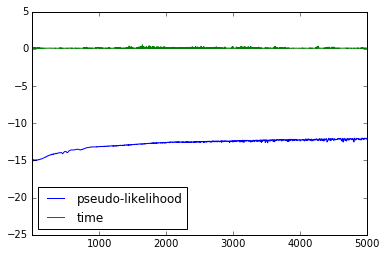

In [30]:
%matplotlib inline
plt = rbm.log.plot()
plt#.set_xscale('log')

## Sampling

In [25]:
from IPython.display import display, HTML

def show_pedalboard(pedalboard, plugins):
    def make_html(image):
        return '<img src="images/{}.png" style="display:inline;margin:1px"/>'.format(image)

    images = list(plugins[pedalboard == True].index)
    return display(HTML(''.join(make_html(image) for image in images)))

def category_of_pedalboard(plugins, pedalboard):
    return plugins[pedalboard == True]

In [26]:
original = pedalboards_train.iloc[1].values
show_pedalboard(original, plugins)
category_of_pedalboard(plugins, original)

,name,category
id,,
27,ZNR,Dynamics
30,GraphicEQ,Filter_EQ
54,TapeEcho,Delay
64,Arena,Reverb
73,T Scream,Stomp Modeling
98,MS CRUNCH,Amp Modeling


In [32]:
from code.experiment import Experiment

original = pedalboards_train.iloc[1].values.copy()
original = original == True

index = plugins[original == True].index
train, test = train_test_split(index, train_size=.5)

original_train = original.copy()
original_test = original.copy()
original_train[test] = 0
original_test[train] = 0

print("Original")
show_pedalboard(original, plugins)
print("Train")
show_pedalboard(original_train, plugins)
print("Validation")
show_pedalboard(original_test, plugins)

experiment = Experiment(rbm)
print("Result")
show_pedalboard(experiment.recommend(original_train, size=6), plugins)

Original


Train


Validation


Result


In [9]:

entrada = original

total = 1
while rbm.score_samples([entrada]) < -.1 or total < 10:
    #print(total, rbm.score_samples([entrada]))
    entrada = rbm.gibbs(entrada)
    total += 1

show_pedalboard(entrada, plugins)
category_of_pedalboard(plugins, entrada)

KeyboardInterrupt: 

## Teste 2

In [ ]:
import numpy as np
pedalboard_treino = np.zeros(117, dtype=np.bool)

pedalboard_treino[27] = 1
pedalboard_treino[107] = 1

resultado = pedalboard_treino

total = 1
while rbm.score_samples([resultado]) < -.1 or total < 10:
    total += 1

    resultado |= pedalboard_treino
    resultado = rbm.gibbs(resultado)

show_pedalboard(pedalboard_treino, plugins)
show_pedalboard(resultado, plugins)
category_of_pedalboard(plugins, resultado)

## testando

In [ ]:
'''
RANDOM_STATE = 0

from sklearn.neural_network import BernoulliRBM

rbm = BernoulliRBM(random_state=RANDOM_STATE, verbose=True)

rbm.learning_rate = 0.06
rbm.n_iter = 20
rbm.n_components = 1 # hidden units

pedalboards_train = [list([1,1,0,0]) for i in range(100)] + [list([0,0,1,0]) for i in range(10)]

rbm.fit(pedalboards_train)

entrada = [0, 0, 0, 0]
for _ in range(10000):
    entrada = rbm.gibbs(entrada)

entrada
'''

## Evaluation - how to?

In [ ]:
original = pedalboards_train.iloc[214].values.copy()

index = plugins[original == True].index
train, test = train_test_split(index, train_size=.5)

original_train = original.copy()
original_test = original.copy()
original_train[test] = 0
original_test[train] = 0

print('Pedalboard')
show_pedalboard(original, plugins)
print('Train')
show_pedalboard(original_train, plugins)

In [ ]:
def recommend(pedalboard, score=-.08, size=None):
    len_pedalboard = lambda pedalboard: len(pedalboard[pedalboard == True])
    if size is None:
        size = len_pedalboard(original)

    result = original
    while True:
        #result |= result
        result = rbm.gibbs(result)
        if (rbm.score_samples([result]) > score
        and len_pedalboard(result) == size):
            break

    return result

recommended = recommend(original_train, score=-1)

show_pedalboard(recommended, plugins)

In [ ]:
from code.experiment import Experiment

experiment = Experiment(rbm)
experiment.recommend(train)

In [ ]:
def evaluate(recommended, train, test, original):
    def len_of(element):
        return len(element[element == True])
    
    preserve = 0 if len_of(train) == 0 else len_of(train & recommended) / len_of(train)
    discover = 0 if len_of(test)  == 0 else len_of(test & recommended) / len_of(test)
    total = 0 if len_of(original) == 0 else len_of(original & recommended) / len_of(original)
    
    return preserve, discover, total

evaluate(recommended, original_train, original_test, original)

In [ ]:
def mensure(pedalboards, plugins):
    results_train = pd.DataFrame(columns=('preserve', 'discover', 'total'))
    
    for position, pedalboard_index in enumerate(pedalboards.index):
        pedalboard = pedalboards.iloc[position].values.copy()

        index = plugins[pedalboard == True].index
        effects_train, effects_test = train_test_split(index, train_size=.5)

        pedalboard_train = pedalboard.copy()
        pedalboard_test = pedalboard.copy()
        pedalboard_train[effects_test] = 0
        pedalboard_test[effects_train] = 0

        recommended = recommend(pedalboard_train, score=-1)
        results_train.loc[pedalboard_index[0]] = evaluate(recommended, pedalboard_train, pedalboard_test, pedalboard)
    
    return results_train

result = mensure(pedalboards_train, plugins)
result

In [ ]:
result.mean()

In [ ]:
test = mensure(pedalboards_test, plugins)
test

In [ ]:
test.mean()